Purpose: To examine the temperature differences between 37 different stations.

Data range from 1/1/2008 to 31/8/2017 in hourly resolution


Data taken from http://www.victoriaweather.ca/ as a part of Uvic's school based weather network stations

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Cleaning and rearranging

In [3]:
df = pd.read_csv('All_Station_Temp.csv',sep = ' ',header = 1)
df.drop(columns = ['Unnamed: 38' ], axis = 1, inplace = True);
df.head()

,Unnamed: 0,48.5745,48.5376,48.4655,48.4608,48.4356,48.5273,48.4529,48.6804,48.4562,...,48.4683,48.4744,48.4205,48.6568,48.4533,48.6529,48.4865,48.4623,48.4359,48.4572
0,733408.0000,3.25,1.43,4.21,4.62,3.45,4.44,2.72,3.97,4.68,...,4.29,4.10,3.01,NaN,4.00,4.81,4.58,NaN,4.87,4.07
1,733408.0417,3.06,1.38,4.28,4.77,3.46,4.21,2.64,4.15,4.61,...,4.41,4.30,2.87,NaN,4.15,4.60,4.44,NaN,4.85,4.05
2,733408.0833,1.90,1.18,4.12,4.70,3.46,4.07,2.64,4.18,4.62,...,4.24,4.23,2.97,NaN,4.06,4.65,4.47,NaN,4.91,4.02
3,733408.1250,1.69,0.98,4.20,4.77,3.65,3.67,2.81,4.27,4.71,...,4.36,4.30,3.10,NaN,4.12,4.75,4.53,NaN,4.97,4.06
4,733408.1667,2.09,0.93,4.61,4.99,3.90,3.55,3.11,4.29,4.93,...,4.58,4.53,3.37,NaN,4.25,4.97,4.68,NaN,5.17,4.27


In [4]:
df.rename(columns = {'Unnamed: 0':'Datetime'},inplace = True)
df.head()

,Datetime,48.5745,48.5376,48.4655,48.4608,48.4356,48.5273,48.4529,48.6804,48.4562,...,48.4683,48.4744,48.4205,48.6568,48.4533,48.6529,48.4865,48.4623,48.4359,48.4572
0,733408.0000,3.25,1.43,4.21,4.62,3.45,4.44,2.72,3.97,4.68,...,4.29,4.10,3.01,NaN,4.00,4.81,4.58,NaN,4.87,4.07
1,733408.0417,3.06,1.38,4.28,4.77,3.46,4.21,2.64,4.15,4.61,...,4.41,4.30,2.87,NaN,4.15,4.60,4.44,NaN,4.85,4.05
2,733408.0833,1.90,1.18,4.12,4.70,3.46,4.07,2.64,4.18,4.62,...,4.24,4.23,2.97,NaN,4.06,4.65,4.47,NaN,4.91,4.02
3,733408.1250,1.69,0.98,4.20,4.77,3.65,3.67,2.81,4.27,4.71,...,4.36,4.30,3.10,NaN,4.12,4.75,4.53,NaN,4.97,4.06
4,733408.1667,2.09,0.93,4.61,4.99,3.90,3.55,3.11,4.29,4.93,...,4.58,4.53,3.37,NaN,4.25,4.97,4.68,NaN,5.17,4.27


In [5]:
len(df)

84721

Convert timestamp to datetime

use

pd.to_datetime(date_str) converts a string of date into datetime variables

and date_range()

In [6]:
date_str = '1/1/2008'
drange = pd.date_range(date_str, periods = len(df), freq = 'H')

In [7]:
datetime_col = pd.DataFrame(drange)
datetime_col.rename(columns = {0:'Datetime'},inplace = True)
datetime_col.head()

,Datetime
0,2008-01-01 00:00:00
1,2008-01-01 01:00:00
2,2008-01-01 02:00:00
3,2008-01-01 03:00:00
4,2008-01-01 04:00:00


In [8]:
temp = df.copy()
temp.drop(columns = {'Datetime'},inplace = True);
temp.head()

,48.5745,48.5376,48.4655,48.4608,48.4356,48.5273,48.4529,48.6804,48.4562,48.3891,...,48.4683,48.4744,48.4205,48.6568,48.4533,48.6529,48.4865,48.4623,48.4359,48.4572
0,3.25,1.43,4.21,4.62,3.45,4.44,2.72,3.97,4.68,5.12,...,4.29,4.10,3.01,NaN,4.00,4.81,4.58,NaN,4.87,4.07
1,3.06,1.38,4.28,4.77,3.46,4.21,2.64,4.15,4.61,4.95,...,4.41,4.30,2.87,NaN,4.15,4.60,4.44,NaN,4.85,4.05
2,1.90,1.18,4.12,4.70,3.46,4.07,2.64,4.18,4.62,5.11,...,4.24,4.23,2.97,NaN,4.06,4.65,4.47,NaN,4.91,4.02
3,1.69,0.98,4.20,4.77,3.65,3.67,2.81,4.27,4.71,5.33,...,4.36,4.30,3.10,NaN,4.12,4.75,4.53,NaN,4.97,4.06
4,2.09,0.93,4.61,4.99,3.90,3.55,3.11,4.29,4.93,5.56,...,4.58,4.53,3.37,NaN,4.25,4.97,4.68,NaN,5.17,4.27


In [9]:
temp['Datetime'] = datetime_col['Datetime']
temp.set_index('Datetime',inplace = True)

In [10]:
temp.head()

,48.5745,48.5376,48.4655,48.4608,48.4356,48.5273,48.4529,48.6804,48.4562,48.3891,...,48.4683,48.4744,48.4205,48.6568,48.4533,48.6529,48.4865,48.4623,48.4359,48.4572
Datetime,,,,,,,,,,,,,,,,,,,,,
2008-01-01 00:00:00,3.25,1.43,4.21,4.62,3.45,4.44,2.72,3.97,4.68,5.12,...,4.29,4.10,3.01,NaN,4.00,4.81,4.58,NaN,4.87,4.07
2008-01-01 01:00:00,3.06,1.38,4.28,4.77,3.46,4.21,2.64,4.15,4.61,4.95,...,4.41,4.30,2.87,NaN,4.15,4.60,4.44,NaN,4.85,4.05
2008-01-01 02:00:00,1.90,1.18,4.12,4.70,3.46,4.07,2.64,4.18,4.62,5.11,...,4.24,4.23,2.97,NaN,4.06,4.65,4.47,NaN,4.91,4.02
2008-01-01 03:00:00,1.69,0.98,4.20,4.77,3.65,3.67,2.81,4.27,4.71,5.33,...,4.36,4.30,3.10,NaN,4.12,4.75,4.53,NaN,4.97,4.06
2008-01-01 04:00:00,2.09,0.93,4.61,4.99,3.90,3.55,3.11,4.29,4.93,5.56,...,4.58,4.53,3.37,NaN,4.25,4.97,4.68,NaN,5.17,4.27


 Lets look at the data from 2008 and run some tests

In [11]:
temp_2008 = temp.loc['2008-01-01':'2008-12-31']
temp_2008.tail()

,48.5745,48.5376,48.4655,48.4608,48.4356,48.5273,48.4529,48.6804,48.4562,48.3891,...,48.4683,48.4744,48.4205,48.6568,48.4533,48.6529,48.4865,48.4623,48.4359,48.4572
Datetime,,,,,,,,,,,,,,,,,,,,,
2008-12-31 19:00:00,NaN,0.62,2.88,2.94,1.72,2.45,1.16,2.19,3.06,2.24,...,3.07,2.39,1.32,NaN,3.00,2.85,2.66,NaN,3.23,2.25
2008-12-31 20:00:00,NaN,0.36,1.80,2.32,1.28,2.15,0.80,2.44,2.14,2.27,...,2.34,1.79,0.94,NaN,2.43,2.75,1.74,NaN,1.99,1.81
2008-12-31 21:00:00,NaN,0.25,1.91,2.44,0.98,2.10,0.56,2.78,2.20,1.39,...,2.35,1.85,0.90,NaN,2.59,2.49,1.74,NaN,2.40,1.00
2008-12-31 22:00:00,NaN,0.17,1.74,1.93,0.54,1.74,0.33,2.03,2.04,0.32,...,2.05,1.44,0.28,NaN,2.06,2.17,1.49,NaN,2.31,0.84
2008-12-31 23:00:00,NaN,0.09,1.62,1.33,0.39,1.28,0.18,1.65,1.68,0.14,...,1.57,0.91,0.21,NaN,1.32,1.95,1.19,NaN,2.19,0.76


In [12]:
temp_2008.info()
# need to drop the empty columns for this year

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2008-01-01 00:00:00 to 2008-12-31 23:00:00
Data columns (total 37 columns):
48.5745      5347 non-null float64
48.5376      8393 non-null float64
48.4655      8594 non-null float64
48.4608      8778 non-null float64
48.4356      8391 non-null float64
48.5273      8596 non-null float64
48.4529      8272 non-null float64
48.6804      8584 non-null float64
48.4562      8568 non-null float64
48.3891      8670 non-null float64
48.4382      8778 non-null float64
48.6600      7905 non-null float64
48.4651      8491 non-null float64
48.4281      8641 non-null float64
48.3640      8602 non-null float64
48.3710      8335 non-null float64
48.3874      4005 non-null float64
48.5677      8010 non-null float64
48.4788      8563 non-null float64
48.4655.1    7900 non-null float64
48.4451      8662 non-null float64
48.5014      8415 non-null float64
48.4253      8593 non-null float64
48.4161      4349 non-null float64
48.4182      8780

In [13]:
temp_2008.drop(columns = ['48.4623','48.6568'], inplace = True)
temp_2008.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2008-01-01 00:00:00 to 2008-12-31 23:00:00
Data columns (total 35 columns):
48.5745      5347 non-null float64
48.5376      8393 non-null float64
48.4655      8594 non-null float64
48.4608      8778 non-null float64
48.4356      8391 non-null float64
48.5273      8596 non-null float64
48.4529      8272 non-null float64
48.6804      8584 non-null float64
48.4562      8568 non-null float64
48.3891      8670 non-null float64
48.4382      8778 non-null float64
48.6600      7905 non-null float64
48.4651      8491 non-null float64
48.4281      8641 non-null float64
48.3640      8602 non-null float64
48.3710      8335 non-null float64
48.3874      4005 non-null float64
48.5677      8010 non-null float64
48.4788      8563 non-null float64
48.4655.1    7900 non-null float64
48.4451      8662 non-null float64
48.5014      8415 non-null float64
48.4253      8593 non-null float64
48.4161      4349 non-null float64
48.4182      8780

C:\Users\codyl\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


We have two options for dealing with NaN values

We can either replace every instance of NaN with the mean of the column or we can try to interpolate the values

Notice that the Nan appear to be grouped together in a long chain.

lets start with the mean() method

In [14]:
temp_mean = temp_2008.fillna(value = temp_2008.mean())

In [15]:
temp_mean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2008-01-01 00:00:00 to 2008-12-31 23:00:00
Data columns (total 35 columns):
48.5745      8784 non-null float64
48.5376      8784 non-null float64
48.4655      8784 non-null float64
48.4608      8784 non-null float64
48.4356      8784 non-null float64
48.5273      8784 non-null float64
48.4529      8784 non-null float64
48.6804      8784 non-null float64
48.4562      8784 non-null float64
48.3891      8784 non-null float64
48.4382      8784 non-null float64
48.6600      8784 non-null float64
48.4651      8784 non-null float64
48.4281      8784 non-null float64
48.3640      8784 non-null float64
48.3710      8784 non-null float64
48.3874      8784 non-null float64
48.5677      8784 non-null float64
48.4788      8784 non-null float64
48.4655.1    8784 non-null float64
48.4451      8784 non-null float64
48.5014      8784 non-null float64
48.4253      8784 non-null float64
48.4161      8784 non-null float64
48.4182      8784

C:\Users\codyl\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


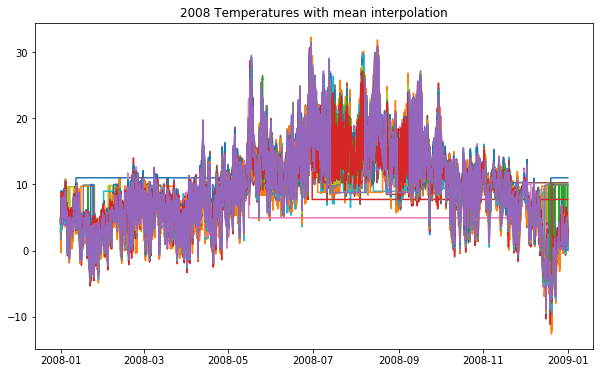

In [16]:
figure1, ax1 = plt.subplots(figsize = (10,6))

ax1.set_title('2008 Temperatures with mean interpolation')
ax1.plot(temp_mean);

Now we try an interpolation

We will start with a linear and then a cubic spline interpolation 

In [17]:
linear_temp = temp_2008.interpolate(kind = 'linear')

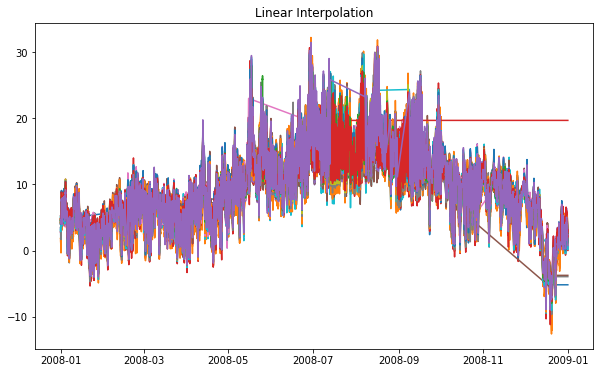

In [18]:
figure2, ax2 = plt.subplots(figsize = (10,6))


ax2.set_title('Linear Interpolation')
ax2.plot(linear_temp);

In [19]:
from scipy.interpolate import CubicSpline

In [20]:
x = temp_2008.iloc[:,:1].interpolate(kind = 'cubic').values

In [21]:
len(x)

8784

In [22]:
t = range(0,len(x),1)

In [23]:
len(df.columns)

38

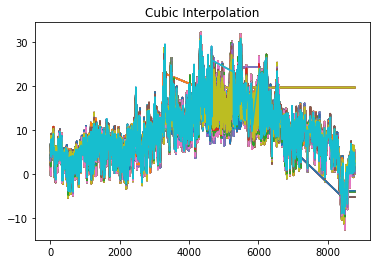

In [200]:
plt.title('Cubic Interpolation')
for i in range(1,len(df.columns),1):
    plt.plot(t,temp_2008.iloc[:,:i].interpolate(kind = 'cubic').values)


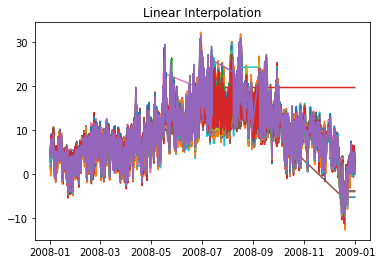

In [24]:
plt.title('Linear Interpolation')
plt.plot(linear_temp);

Very few differences between the two due to NaN values appearing in groups.This created large gaps in the data which resulted in the cubic interpolation mirroring the linear interpolation

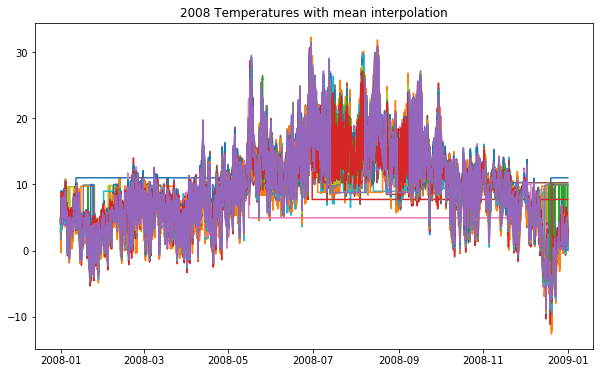

In [40]:
figure1

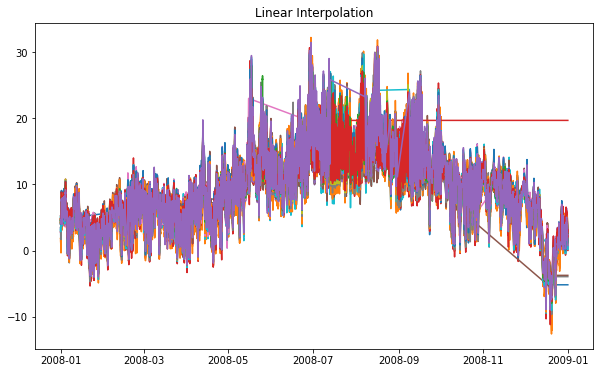

In [206]:
figure2

The large gaps in some of the data makes the linear and cubic interpolation less reliable than the mean interpolation. Therefore we will use the mean data for the PCA  (temp_mean)

Now we can begin PCA

Lets take the top five most significant sources and see if we should reduce it further

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [26]:
X = StandardScaler().fit_transform(temp_mean)


pca = PCA(n_components = 5)
components = pca.fit_transform(X)

column_names = ['P1','P2','P3','P4','P5']
principle_df = pd.DataFrame(components, columns = column_names)

In [27]:
principle_df.head()

,P1,P2,P3,P4,P5
0,-5.633413,0.423077,-0.388130,1.011374,0.035935
1,-5.647100,0.398631,-0.377934,1.055672,0.000595
2,-5.691388,0.547039,-0.322914,1.244691,0.030617
3,-5.602746,0.706074,-0.336927,1.262679,0.045368
4,-5.396754,0.735710,-0.315758,1.196152,0.022895


In [28]:
pca.explained_variance_ratio_,pca.explained_variance_ratio_.sum()

(array([0.88538622, 0.03032061, 0.02130459, 0.01313262, 0.00729292]),
 0.9574369541348821)

The highest variance ratio is the column that contains the most information

BUT how does this help? How is the P1,P2,... relevant to the original data?

Or which station exhibits the most variability?

In [29]:
# Lets do the first component P1 first

pca.components_[0]

array([0.12755656, 0.17441738, 0.17834667, 0.17819934, 0.17617915,
       0.17464139, 0.17617814, 0.17580906, 0.17764999, 0.17062145,
       0.17784113, 0.16636261, 0.16932977, 0.17650138, 0.17459942,
       0.17100827, 0.07649111, 0.16027804, 0.17703559, 0.16565906,
       0.17645323, 0.16862121, 0.17603442, 0.10857879, 0.17613686,
       0.15684411, 0.17831579, 0.1775187 , 0.17769478, 0.17671117,
       0.17647804, 0.17600861, 0.1773063 , 0.17796432, 0.16459261])

In [30]:
pca.components_[1].round(5)

array([-3.2558e-01, -5.7150e-02, -2.0190e-02, -1.2800e-03,  9.0400e-03,
        6.2800e-03, -2.8600e-03, -3.4780e-02, -2.1580e-02,  5.0520e-02,
        2.3250e-02, -9.1440e-02, -1.3882e-01,  7.2600e-03, -3.9800e-03,
        1.1102e-01,  8.0683e-01, -2.4496e-01, -1.6640e-02,  7.0910e-02,
       -7.9300e-03,  5.7780e-02,  3.8510e-02,  3.2109e-01,  2.9470e-02,
       -9.7880e-02, -4.2000e-04, -1.3780e-02, -1.1650e-02, -3.4300e-03,
       -1.4800e-03, -8.4600e-03, -4.6330e-02, -6.9100e-03,  8.9900e-02])

In [31]:
correlation_df = pd.DataFrame(pca.components_[:4], columns = temp_mean.columns, index = ['P1','P2','P3','P4'])

In [32]:
correlation_df = correlation_df.round(5)

In [33]:
max(correlation_df.iloc[0])

0.17835

In [34]:
answer1 = correlation_df.columns[correlation_df.isin([0.17835]).any()] 

In [35]:
answer1
# so highest correlation is for the station on 48.4655 for P1

Index(['48.4655'], dtype='object')

Below gives the results for all values of 

In [36]:
# for P2, P3, P4, P5

for i in range(0,4,1):
    new_list = []
    new_list.append(max(correlation_df.iloc[i]))
    print(new_list)


[0.17835]
[0.80683]
[0.77824]
[0.15882]


In [37]:
for i in range(0,4,1):
    new_list = []
    max_val = max(correlation_df.iloc[i])
    temp = correlation_df.columns[correlation_df.isin([max_val]).any()] 
    new_list.append(temp)
    print(temp)

Index(['48.4655'], dtype='object')
Index(['48.3874'], dtype='object')
Index(['48.4161'], dtype='object')
Index(['48.6701'], dtype='object')


Therefore, these stations exhibit the strongest correlation to P (1,2,3,4)

However, P2 and P3 notably have a higher correlation with the stations 

48.3874 and 48.4261 

Now we create plots

https://blog.bioturing.com/2018/06/18/how-to-read-pca-biplots-and-scree-plots/


https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/

We can even divide the data into seasons to better classify them

For this case, lets catagorize the Months from:

dec to mar = winter <br>
mar to june = spring <br>
june to sept = summer <br>
sept to dec = fall <br>

** note that this is inclusive to noninclusive

To simplify the data slightly, we will assume that the months are equal length and seasons all end and start at the end and start of the month respectively

In [38]:
len(temp_mean)/12 
# the lengths of our "months"

732.0

In [39]:
def month(mon):
    new_list = []
    for i in range(0,732,1):
        new_list.append(mon)
    return new_list

In [40]:
Winter =  month('Winter')
Spring = 3*month('Spring')
Summer = 3*month('Summer')
Fall = 3*month('Fall')

In [41]:
Year = 2*Winter + Spring + Summer + Fall + Winter

In [42]:
Year_df = pd.DataFrame(Year, columns = ['Season'])
Year_df.head()

,Season
0,Winter
1,Winter
2,Winter
3,Winter
4,Winter


In [43]:
# require the principle components
principle_df.head()

,P1,P2,P3,P4,P5
0,-5.633413,0.423077,-0.388130,1.011374,0.035935
1,-5.647100,0.398631,-0.377934,1.055672,0.000595
2,-5.691388,0.547039,-0.322914,1.244691,0.030617
3,-5.602746,0.706074,-0.336927,1.262679,0.045368
4,-5.396754,0.735710,-0.315758,1.196152,0.022895


In [44]:
final_df = pd.concat([principle_df,Year_df['Season']], axis = 1)

In [45]:
final_df.head()

,P1,P2,P3,P4,P5,Season
0,-5.633413,0.423077,-0.388130,1.011374,0.035935,Winter
1,-5.647100,0.398631,-0.377934,1.055672,0.000595,Winter
2,-5.691388,0.547039,-0.322914,1.244691,0.030617,Winter
3,-5.602746,0.706074,-0.336927,1.262679,0.045368,Winter
4,-5.396754,0.735710,-0.315758,1.196152,0.022895,Winter


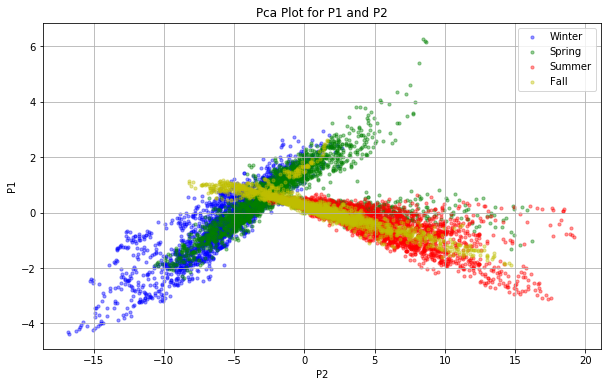

In [46]:
## Scatter plot or PCA plot
figure_pca, axpca = plt.subplots(figsize = (10,6))

axpca.set_title('Pca Plot for P1 and P2')
axpca.set_xlabel('P2')
axpca.set_ylabel('P1')


targets = ['Winter','Spring','Summer','Fall']
colors =['b','g','r','y']

for target, color in zip(targets, colors):
    indicesToKeep = final_df['Season'] == target
    axpca.scatter(final_df.loc[indicesToKeep, 'P1']
                 ,final_df.loc[indicesToKeep, 'P2']
                 , c = color
                , s = 10
                 , alpha = .4)
    
axpca.legend(targets);
axpca.grid()


How to read?

If two components are uncorrelated then they are orthogonal to each other


Plot analysis

Can see similarities between the winter and spring sets as well as
the summer and fall sets

Winter and summer tends to have more fluctations than the other seasons

Now to create a loading plot

In [47]:
principle_df.head()

,P1,P2,P3,P4,P5
0,-5.633413,0.423077,-0.388130,1.011374,0.035935
1,-5.647100,0.398631,-0.377934,1.055672,0.000595
2,-5.691388,0.547039,-0.322914,1.244691,0.030617
3,-5.602746,0.706074,-0.336927,1.262679,0.045368
4,-5.396754,0.735710,-0.315758,1.196152,0.022895


In [48]:
len(pca.components_)

5

In [49]:
# create a list that has len temp_mean
# made up of values 0,1,2,3


def sea(num):
    new_list = []
    for i in range(int(round(len(temp_mean)/12))):
        new_list.append(num)
    return new_list

ya = 2*sea(0) + 3*sea(1) + 3*sea(2) + 3*sea(3) +sea(0)

len(ya)

8784

In [50]:
import math

In [51]:
int(round(len(temp_mean)/12))

732

['Winter', 'Spring', 'Summer', 'Fall']

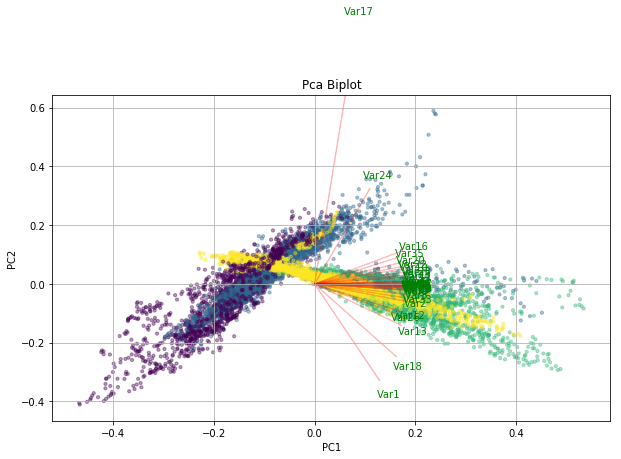

In [66]:
def loading_plot (prince, comp, labels = None):
    
    a = prince.iloc[:,0]
    b = prince.iloc[:,1]
    n = comp.shape[0]
    
    scalex = 1.0/(a.max() - a.min())
    scaley = 1.0/(b.max() - b.min())
    
    plt.figure(figsize = (10,6))
    plt.scatter(a * scalex,b * scaley, c = ya, s = 10, alpha = .4)
    plt.title('Pca Biplot')
    
    
    for i in range(n):
        plt.arrow(0, 0, comp[i,0], comp[i,1],color = 'r',alpha = 0.2)
        # there is nothing there place string Var
        # else continue with the arrow
        if labels is None:
            plt.text(comp[i,0]* 1.15, comp[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(comp[i,0]* 1.15, comp[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

    
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
loading_plot(principle_df,np.transpose(pca.components_[0:2, :]))
plt.show()
    
    

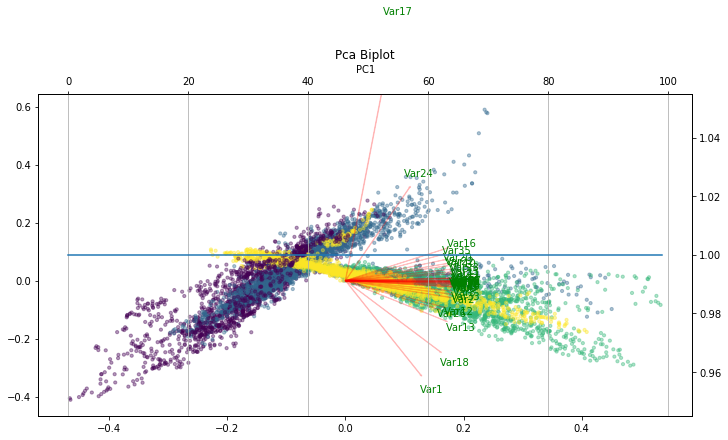

In [53]:
def loading_plot (prince, comp, labels = None):
    
    a = prince.iloc[:,0]
    b = prince.iloc[:,1]
    n = comp.shape[0]
    
    scalex = 1.0/(a.max() - a.min())
    scaley = 1.0/(b.max() - b.min())
    
    fig_loading,ax_loading = plt.subplots(figsize = (10,6),constrained_layout=True)
    
    ax_loading.scatter(a * scalex,b * scaley, c = ya, s = 10, alpha = .4)
    ax_loading.set_title('Pca Biplot')
  
    

    for i in range(n):
        plt.arrow(0, 0, comp[i,0], comp[i,1],color = 'r',alpha = 0.2)
        # there is nothing there place string Var
        # else continue with the arrow
        if labels is None:
            plt.text(comp[i,0]* 1.15, comp[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(comp[i,0]* 1.15, comp[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    #plt.xlim(-1,1)
    #plt.ylim(-1,1)
   
    ax_loading2 = ax_loading.twinx().twiny()

    ax_loading2.plot(range(100), np.ones(100))
    
    
    
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
loading_plot(principle_df,np.transpose(pca.components_[0:2, :]))
plt.show()
    
    

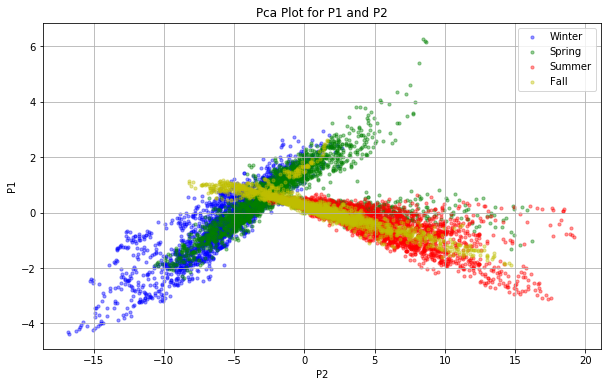

In [54]:
figure_pca

# done using final_df

In [55]:
final_df.head()

,P1,P2,P3,P4,P5,Season
0,-5.633413,0.423077,-0.388130,1.011374,0.035935,Winter
1,-5.647100,0.398631,-0.377934,1.055672,0.000595,Winter
2,-5.691388,0.547039,-0.322914,1.244691,0.030617,Winter
3,-5.602746,0.706074,-0.336927,1.262679,0.045368,Winter
4,-5.396754,0.735710,-0.315758,1.196152,0.022895,Winter


Scree Plot

This displays the variance of each principle component

In [56]:
pca.explained_variance_

array([30.99204583,  1.06134219,  0.74574541,  0.45969392,  0.25528141])

Text(0, 0.5, 'Eigenvalue')

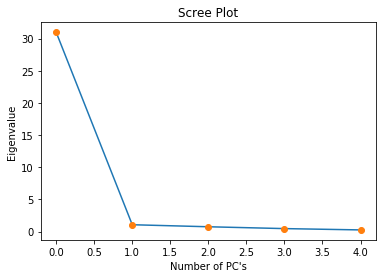

In [57]:
plt.plot(range(0,5,1),pca.explained_variance_)
plt.plot(range(0,5,1),pca.explained_variance_,'o')

plt.title('Scree Plot')
plt.xlabel("Number of PC's")
plt.ylabel('Eigenvalue')

Some sources I used to help create this

https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/

https://blog.bioturing.com/2018/06/18/how-to-read-pca-biplots-and-scree-plots/